In [1]:
import numpy as np
import pandas as pd

In [4]:
train = pd.read_csv("C:/Users/Lenovo/OneDrive - Amity University/celebal tech/train.csv")
test = pd.read_csv("C:/Users/Lenovo/OneDrive - Amity University/celebal tech/test.csv")
sample = pd.read_csv("C:/Users/Lenovo/OneDrive - Amity University/celebal tech/sample_submission.csv")

In [6]:
!pip install kaggle

     ---------------------------------------- 0.0/82.1 kB ? eta -:--:--
     --------- ------------------------------ 20.5/82.1 kB ? eta -:--:--
     -------------------------------------  81.9/82.1 kB 762.6 kB/s eta 0:00:01
     -------------------------------------- 82.1/82.1 kB 574.8 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB 1.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/78.3 kB ? eta -:--:--
   ----------------------------------

In [7]:
import json

# Define the Kaggle API credentials
kaggle_credentials = {
    "username": "sourabhss0",
    "key": "1c54b88f9c7f05b8e8b55f7b7eea6c0b"
}

# Save the credentials to a kaggle.json file
with open('kaggle.json', 'w') as file:
    json.dump(kaggle_credentials, file)

In [9]:
kaggle_dir = os.path.join(os.path.expanduser("~"), '.kaggle')
os.makedirs(kaggle_dir, exist_ok=True)

In [10]:
import shutil
# Move the kaggle.json file to the .kaggle directory
shutil.move('kaggle.json', os.path.join(kaggle_dir, 'kaggle.json'))


'C:\\Users\\Lenovo\\.kaggle\\kaggle.json'

In [11]:
os.chmod(os.path.join(kaggle_dir, 'kaggle.json'), 0o600)

In [12]:
!kaggle competitions download -c plant-pathology-2020-fgvc7


  0%|          | 0.00/779M [00:00<?, ?B/s]
  0%|          | 1.00M/779M [00:01<19:06, 712kB/s]
  0%|          | 2.00M/779M [00:01<11:33, 1.18MB/s]
  0%|          | 3.00M/779M [00:02<08:53, 1.53MB/s]
  1%|          | 4.00M/779M [00:02<07:34, 1.79MB/s]
  1%|          | 5.00M/779M [00:03<06:43, 2.01MB/s]
  1%|          | 6.00M/779M [00:03<06:12, 2.17MB/s]
  1%|          | 7.00M/779M [00:03<05:37, 2.40MB/s]
  1%|1         | 8.00M/779M [00:04<05:25, 2.49MB/s]
  1%|1         | 9.00M/779M [00:04<05:19, 2.53MB/s]
  1%|1         | 10.0M/779M [00:05<05:36, 2.39MB/s]
  1%|1         | 11.0M/779M [00:05<05:28, 2.45MB/s]
  2%|1         | 12.0M/779M [00:06<06:18, 2.13MB/s]
  2%|1         | 13.0M/779M [00:06<06:12, 2.16MB/s]
  2%|1         | 14.0M/779M [00:07<06:17, 2.12MB/s]
  2%|1         | 15.0M/779M [00:07<05:53, 2.27MB/s]
  2%|2         | 16.0M/779M [00:08<05:57, 2.24MB/s]
  2%|2         | 17.0M/779M [00:08<06:01, 2.21MB/s]
  2%|2         | 18.0M/779M [00:09<05:46, 2.30MB/s]
  2%|2         | 19.0

In [13]:
import zipfile

with zipfile.ZipFile('plant-pathology-2020-fgvc7.zip', 'r') as zip_ref:
    zip_ref.extractall('./data')


In [27]:
base_path = "C:/Users/Lenovo/OneDrive - Amity University/celebal tech/data/images/"
# Function to generate the image path based on the image_id
def generate_image_path(image_id):
    return f"{base_path}{image_id}.jpg"

# Apply the function to create the 'img' column
train['img'] = train['image_id'].apply(generate_image_path)
test['img'] = test['image_id'].apply(generate_image_path)

In [28]:
train

,image_id,healthy,multiple_diseases,rust,scab,img
0,Train_0,0,0,0,1,C:/Users/Lenovo/OneDrive - Amity University/ce...
1,Train_1,0,1,0,0,C:/Users/Lenovo/OneDrive - Amity University/ce...
2,Train_2,1,0,0,0,C:/Users/Lenovo/OneDrive - Amity University/ce...
3,Train_3,0,0,1,0,C:/Users/Lenovo/OneDrive - Amity University/ce...
4,Train_4,1,0,0,0,C:/Users/Lenovo/OneDrive - Amity University/ce...
...,...,...,...,...,...,...
1816,Train_1816,0,0,0,1,C:/Users/Lenovo/OneDrive - Amity University/ce...
1817,Train_1817,1,0,0,0,C:/Users/Lenovo/OneDrive - Amity University/ce...
1818,Train_1818,1,0,0,0,C:/Users/Lenovo/OneDrive - Amity University/ce...
1819,Train_1819,0,0,1,0,C:/Users/Lenovo/OneDrive - Amity University/ce...


In [17]:
test

,image_id,img
0,Test_0,C:/Users/Lenovo/OneDrive - Amity University/ce...
1,Test_1,C:/Users/Lenovo/OneDrive - Amity University/ce...
2,Test_2,C:/Users/Lenovo/OneDrive - Amity University/ce...
3,Test_3,C:/Users/Lenovo/OneDrive - Amity University/ce...
4,Test_4,C:/Users/Lenovo/OneDrive - Amity University/ce...
...,...,...
1816,Test_1816,C:/Users/Lenovo/OneDrive - Amity University/ce...
1817,Test_1817,C:/Users/Lenovo/OneDrive - Amity University/ce...
1818,Test_1818,C:/Users/Lenovo/OneDrive - Amity University/ce...
1819,Test_1819,C:/Users/Lenovo/OneDrive - Amity University/ce...


In [29]:
sample

,image_id,healthy,multiple_diseases,rust,scab
0,Test_0,0.25,0.25,0.25,0.25
1,Test_1,0.25,0.25,0.25,0.25
2,Test_2,0.25,0.25,0.25,0.25
3,Test_3,0.25,0.25,0.25,0.25
4,Test_4,0.25,0.25,0.25,0.25
...,...,...,...,...,...
1816,Test_1816,0.25,0.25,0.25,0.25
1817,Test_1817,0.25,0.25,0.25,0.25
1818,Test_1818,0.25,0.25,0.25,0.25
1819,Test_1819,0.25,0.25,0.25,0.25


In [24]:
!pip install pillow

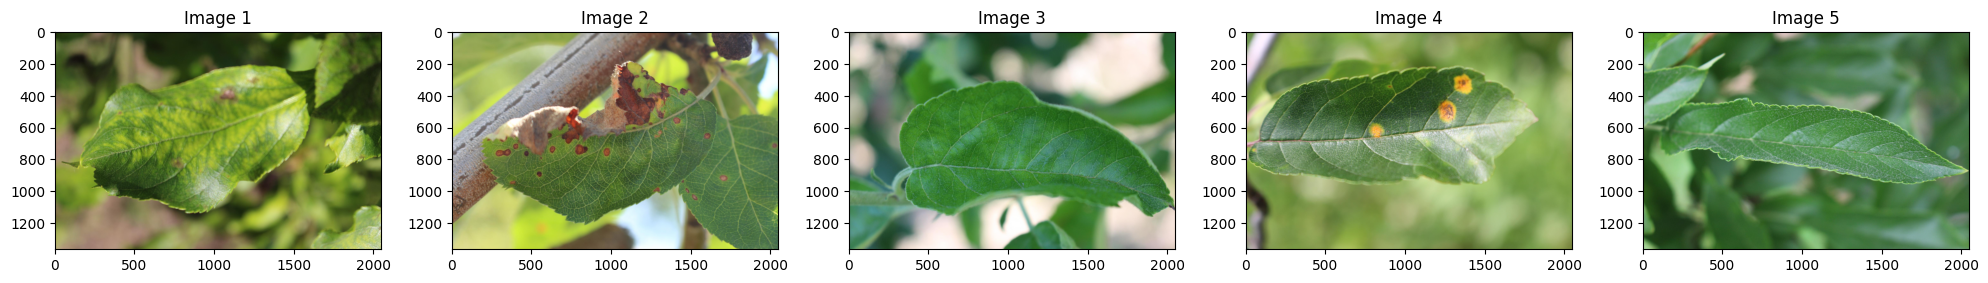

In [55]:
from PIL import Image
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
for i in range(5):
    first_image_path = train['img'].iloc[i]
    image = Image.open(first_image_path)
    
    # Plot each image
    plt.subplot(1, 5, i+1)
    plt.imshow(image)
    plt.title(f"Image {i+1}")
    plt.axis('on')  # Show the axes

plt.tight_layout()
plt.show()

In [32]:
!pip install scikit-learn

     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     --------------------------- ------------ 41.0/60.6 kB 1.9 MB/s eta 0:00:01
     -------------------------------------- 60.6/60.6 kB 645.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.9 MB 4.5 MB/s eta 0:00:03
   ---------------------------------------- 0.1/10.9 MB 1.8 MB/s eta 0:00:07
    --------------------------------------- 0.2/10.9 MB 1.7 MB/s eta 0:00:07
   - -------------------------------------- 0.3/10.9 MB 1.9 MB/s eta 0:00:06
   - -------------------------------------- 0.5/10.9 MB 2.0 MB/s eta 0:00:06
   - -------------------------------------- 0.5/10.9 MB 2.0 MB/s eta 0:00:06
   - -------------------------------------- 0.5/10.9 MB 2.0 MB/s eta 0:00:06
   - -------------------------------------- 0.5/10.9 MB 2.0 MB/s eta 0:00:06
   -- ------------------------------------- 0.7/10.9 MB 1.5 MB/s eta 0:00:07
   --

In [39]:
!pip install tqdm

In [41]:
!pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   -- ------------------------------------ 20.5/294.9 kB 162.5 kB/s eta 0:00:02
   ---- ---------------------------------- 30.7/294.9 kB 186.2 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/294.9 kB 217.9 kB/s eta 0:00:02
   --------------- ---------------------- 122.9/294.9 kB 514.3 kB/s eta 0:00:01
   ------------------------------ ------- 235.5/294.9 kB 846.9 kB/s eta 0:00:01
   -------------------------------------- 294.9/294.9 kB 909.5 kB/s eta 0:00:00


In [42]:
import pandas as pd
import numpy as np
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm  

In [56]:
# Assuming the labels are in separate columns
# Create a single label column
label_columns = ['healthy', 'multiple_diseases', 'rust', 'scab']
train['label'] = train[label_columns].idxmax(axis=1)

# Verify the new label column
print(train[['image_id', 'label']].head())

  image_id              label
0  Train_0               scab
1  Train_1  multiple_diseases
2  Train_2            healthy
3  Train_3               rust
4  Train_4            healthy


In [57]:
# Check unique labels
print("Unique labels in train dataset:")
print(train['label'].unique())


Unique labels in train dataset:
['scab' 'multiple_diseases' 'healthy' 'rust']


In [58]:
# Check for missing values
print("Missing values in the original train dataset:")
print(train['label'].isnull().sum())

Missing values in the original train dataset:
0


In [59]:
# Encode the labels
label_encoder = LabelEncoder()
train['encoded_label'] = label_encoder.fit_transform(train['label'])


In [60]:
# Check the mapping of labels to integers
print("Label encoding mapping:")
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


Label encoding mapping:
{'healthy': 0, 'multiple_diseases': 1, 'rust': 2, 'scab': 3}


In [61]:
# Function to extract features from an image
def extract_features(image_path):
    image = Image.open(image_path)
    image = image.resize((64, 64))  # Resize image to a smaller size
    histogram = np.array(image).flatten()  # Flatten the image array
    return histogram

In [62]:
# Extract features for all images in the training set
X = np.array([extract_features(img) for img in tqdm(train['img'])])
y = train['encoded_label'].values

100%|██████████████████████████████████████████████████████████████████████████████| 1821/1821 [03:12<00:00,  9.44it/s]


In [63]:
# Resample to handle class imbalance
train_combined = pd.concat([train[['img', 'label', 'encoded_label']], pd.DataFrame(X)], axis=1)
train_majority = train_combined[train_combined['label'] != 'healthy']
train_minority = train_combined[train_combined['label'] == 'healthy']


In [65]:
from sklearn.utils import resample
# Upsample the minority class
train_minority_upsampled = resample(train_minority, 
                                    replace=True,    
                                    n_samples=len(train_majority),  
                                    random_state=42)

train_upsampled = pd.concat([train_majority, train_minority_upsampled])


In [66]:
# Encode the labels in the resampled dataset
train_upsampled['encoded_label'] = label_encoder.transform(train_upsampled['label'])

# Extract features and labels
X_upsampled = train_upsampled.iloc[:, 3:].values
y_upsampled = train_upsampled['encoded_label'].values

In [67]:
# Split the resampled data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_upsampled, y_upsampled, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")

Training data shape: (2088, 12288)
Validation data shape: (522, 12288)


In [68]:
# Train and evaluate SVM model with class weights
svm_model = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_val)
accuracy_svm = accuracy_score(y_val, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")

SVM Accuracy: 0.6705


In [70]:
# Train and evaluate Random Forest model with class weights
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_val)
accuracy_rf = accuracy_score(y_val, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")


Random Forest Accuracy: 0.6667


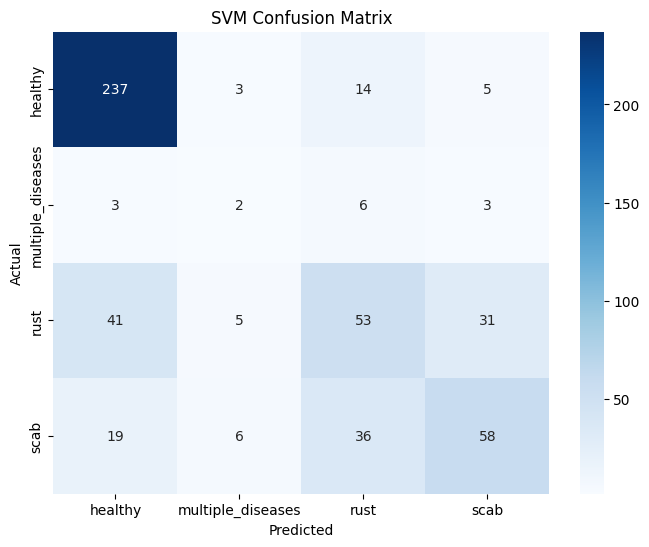

In [71]:
# Visualization and Further Evaluation
conf_matrix_svm = confusion_matrix(y_val, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [72]:
# Generate the classification report with zero_division parameter set to 0
print("Classification Report for SVM:")
print(classification_report(y_val, y_pred_svm, target_names=label_encoder.classes_, zero_division=0))


Classification Report for SVM:
                   precision    recall  f1-score   support

          healthy       0.79      0.92      0.85       259
multiple_diseases       0.12      0.14      0.13        14
             rust       0.49      0.41      0.44       130
             scab       0.60      0.49      0.54       119

         accuracy                           0.67       522
        macro avg       0.50      0.49      0.49       522
     weighted avg       0.65      0.67      0.66       522



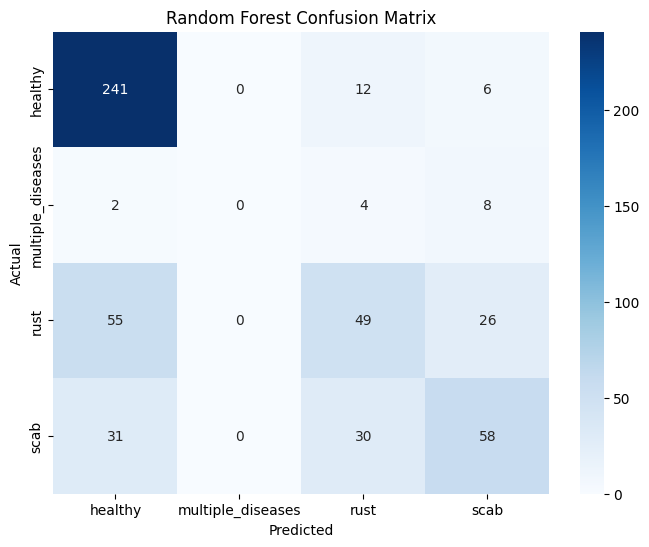

In [73]:
conf_matrix_rf = confusion_matrix(y_val, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [74]:
print("Classification Report for Random Forest:")
print(classification_report(y_val, y_pred_rf, target_names=label_encoder.classes_, zero_division=0))

Classification Report for Random Forest:
                   precision    recall  f1-score   support

          healthy       0.73      0.93      0.82       259
multiple_diseases       0.00      0.00      0.00        14
             rust       0.52      0.38      0.44       130
             scab       0.59      0.49      0.53       119

         accuracy                           0.67       522
        macro avg       0.46      0.45      0.45       522
     weighted avg       0.63      0.67      0.64       522

